In [57]:
import numpy as np
import matplotlib.pyplot as plt
from seismic_purifier import RepresentationLearningAutoencoder, RepresentationLearningDenoisingAutoencoder
from directory import get_checkpoint_path
from config import BATCH_SIZE, N_CHANNELS
from kfold_environment import KFoldEnvironment
from matplotlib.gridspec import GridSpec

In [58]:
# -------------------------------
# Configuration and Setup
# -------------------------------

# Experiment name identifier
EXP_NAME = "exp_test"

# Choose the representation learning model class
REPRESENTATION_LEARNING_MODEL_CLASS = RepresentationLearningDenoisingAutoencoder

# Specify training and testing datasets ('stead' or 'instance')
TRAIN_DATASET = "stead"
TEST_DATASET = "stead"

# Number of training epochs
EPOCH = 6

# Data split identifier
SPLIT = 0

# Num of samples to plot.
NUM_SAMPLES = 10

In [59]:
def compute_autocovariance(data):
    """
    Computes the autocovariance for each channel and averages them.
    
    Args:
        data (np.ndarray): 2D array with shape (timesteps, channels)
    
    Returns:
        lags (np.ndarray): Lag values
        avg_autocov (np.ndarray): Averaged autocovariance
    """
    num_timesteps, num_channels = data.shape
    autocovariances = []
    for c in range(num_channels):
        channel_data = data[:, c]
        channel_data = channel_data - np.mean(channel_data)  # Zero-mean
        autocov = np.correlate(channel_data, channel_data, mode='full')
        autocovariances.append(autocov)
    autocovariances = np.array(autocovariances)
    avg_autocov = np.mean(autocovariances, axis=0)
    lags = np.arange(-num_timesteps + 1, num_timesteps)
    return lags, avg_autocov

def plot_waveform_channel(ax, timesteps, waveform, channel_idx, color='blue', show_xticks=True):
    """
    Plots a single waveform channel on the given axes.
    
    Args:
        ax (matplotlib.axes.Axes): Axes to plot on
        timesteps (np.ndarray): Array of timesteps
        waveform (np.ndarray): Waveform data for one channel
        channel_idx (int): Channel index (0-based)
        color (str): Color for the plot
        show_xticks (bool): Whether to show x-axis tick labels and label
    """
    channels =['E', 'N', 'Z']
    ax.plot(timesteps, waveform, color=color, linewidth=1)
    ax.set_title(channels[channel_idx], fontsize=12, pad=10)
    
    if show_xticks:
        ax.set_xlabel('Timesteps', fontsize=10)
        ax.set_ylabel('Amplitude', fontsize=10)
        ax.tick_params(axis='x', labelsize=8)
    else:
        ax.set_xlabel('')
        ax.set_ylabel('Amplitude', fontsize=10)
        ax.set_xticklabels([])
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    
    ax.grid(True)

def plot_heatmap(ax, heatmap):
    """
    Plots the heatmap on the given axes.
    
    Args:
        ax (matplotlib.axes.Axes): Axes to plot on
        heatmap (np.ndarray): Shape (94, 64)
    """
    cax = ax.imshow(heatmap, aspect='auto', cmap='magma', origin='lower')
    ax.set_title('Heatmap (Feature Map)')
    ax.set_xlabel('Channels')
    ax.set_ylabel('Timesteps')
    plt.colorbar(cax, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)

def plot_autocovariance(ax, lags, autocov, title):
    """
    Plots the autocovariance function on the given axes.
    
    Args:
        ax (matplotlib.axes.Axes): Axes to plot on
        lags (np.ndarray): Lag values
        autocov (np.ndarray): Autocovariance values
        title (str): Title of the plot
    """
    ax.plot(lags, autocov)
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocovariance')

def load_model():
    # Initialize the representation learning model
    model = REPRESENTATION_LEARNING_MODEL_CLASS()
    model.compile()

    # Perform a forward pass with random input to initialize model weights
    model(np.random.normal(size=[BATCH_SIZE, 3000, N_CHANNELS]))

    # Construct the checkpoint path for the model weights
    cp_path = get_checkpoint_path(
        EXP_NAME,
        REPRESENTATION_LEARNING_MODEL_CLASS().name,
        TRAIN_DATASET,
        SPLIT,
        EPOCH
    )

    # Load the pre-trained weights into the model
    model.load_weights(cp_path)
    return model

def load_sample_data():
    """
    Generates sample waveform and heatmap data.
    
    Returns:
        waveform (np.ndarray): Shape (NUM_SAMPLES, 3000, 3)
        labels (np.ndarray): Shape (NUM_SAMPLES)
        metadata (dataframe)
    """
    # Create a K-Fold environment for the specified test dataset
    kenv = KFoldEnvironment(TEST_DATASET)

    # Retrieve metadata for training, validation, and testing splits
    __, __, test_metadata = kenv.get_split_metadata(SPLIT)

    # Retrieve data generators for training, validation, and testing
    __, __, test_gen, __ = kenv.get_generators(SPLIT)
    
    # -------------------------------
    # Data Preparation
    # -------------------------------

    # Initialize lists to hold batches of data
    X = []
    Y = []

    num_batches = 1 + (NUM_SAMPLES // BATCH_SIZE)
    
    # Iterate over the test generator.
    for i in range(num_batches):
        x_batch, y_batch = test_gen.__getitem__(i)
        X.append(x_batch)
        Y.append(y_batch)

    # Concatenate all batches into single numpy arrays
    X = np.concatenate(X, axis=0)
    Y = np.concatenate(Y, axis=0)
    
    X = X[0:NUM_SAMPLES]
    Y = Y[0:NUM_SAMPLES]
    
    return X, Y, test_metadata

/tmp/ipykernel_542790/478625659.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


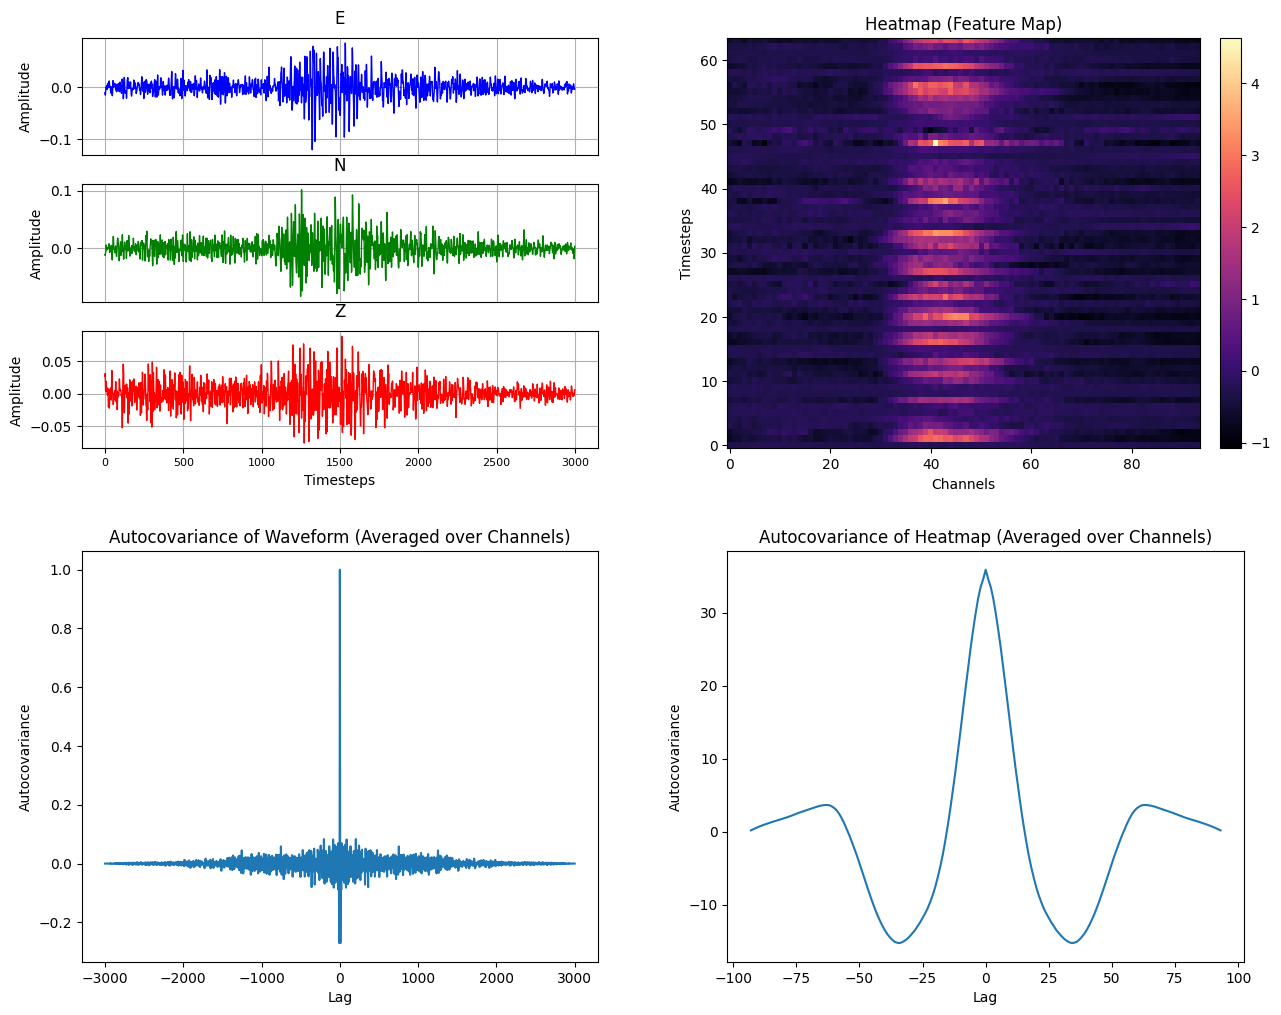

/tmp/ipykernel_542790/478625659.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


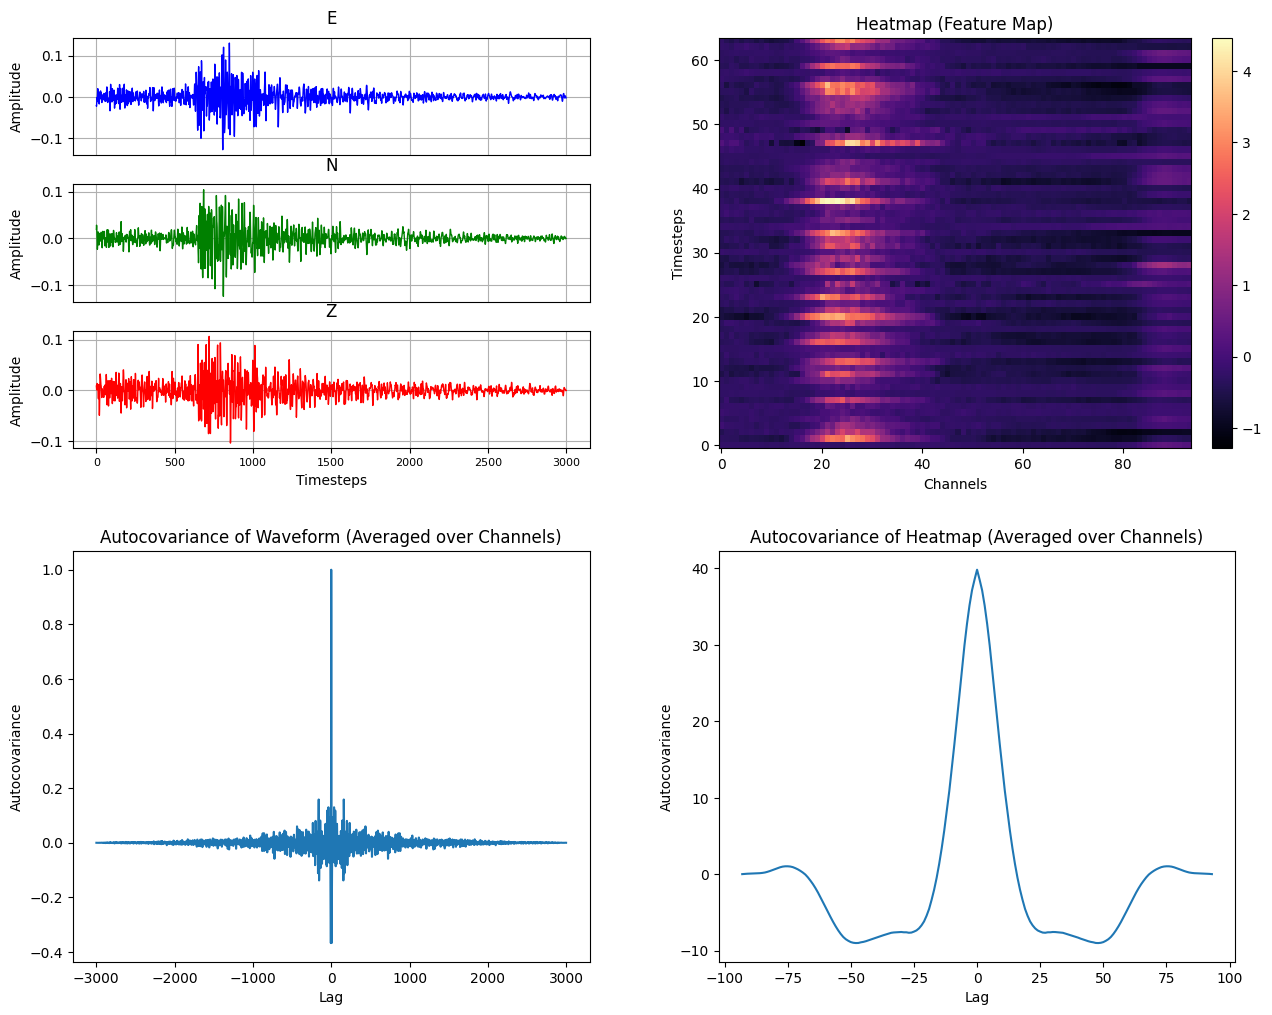

/tmp/ipykernel_542790/478625659.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


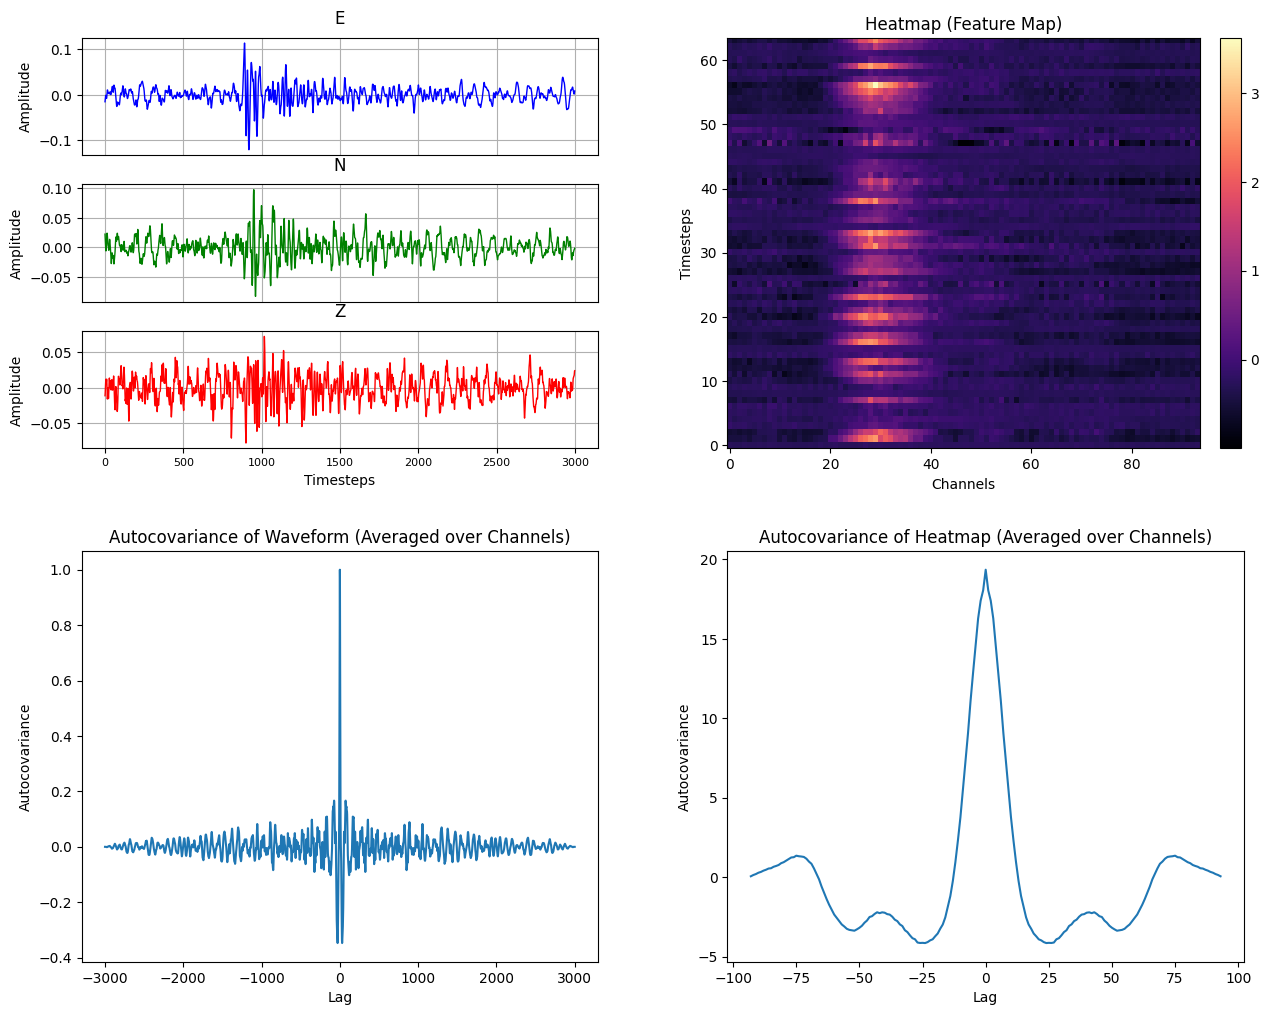

/tmp/ipykernel_542790/478625659.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


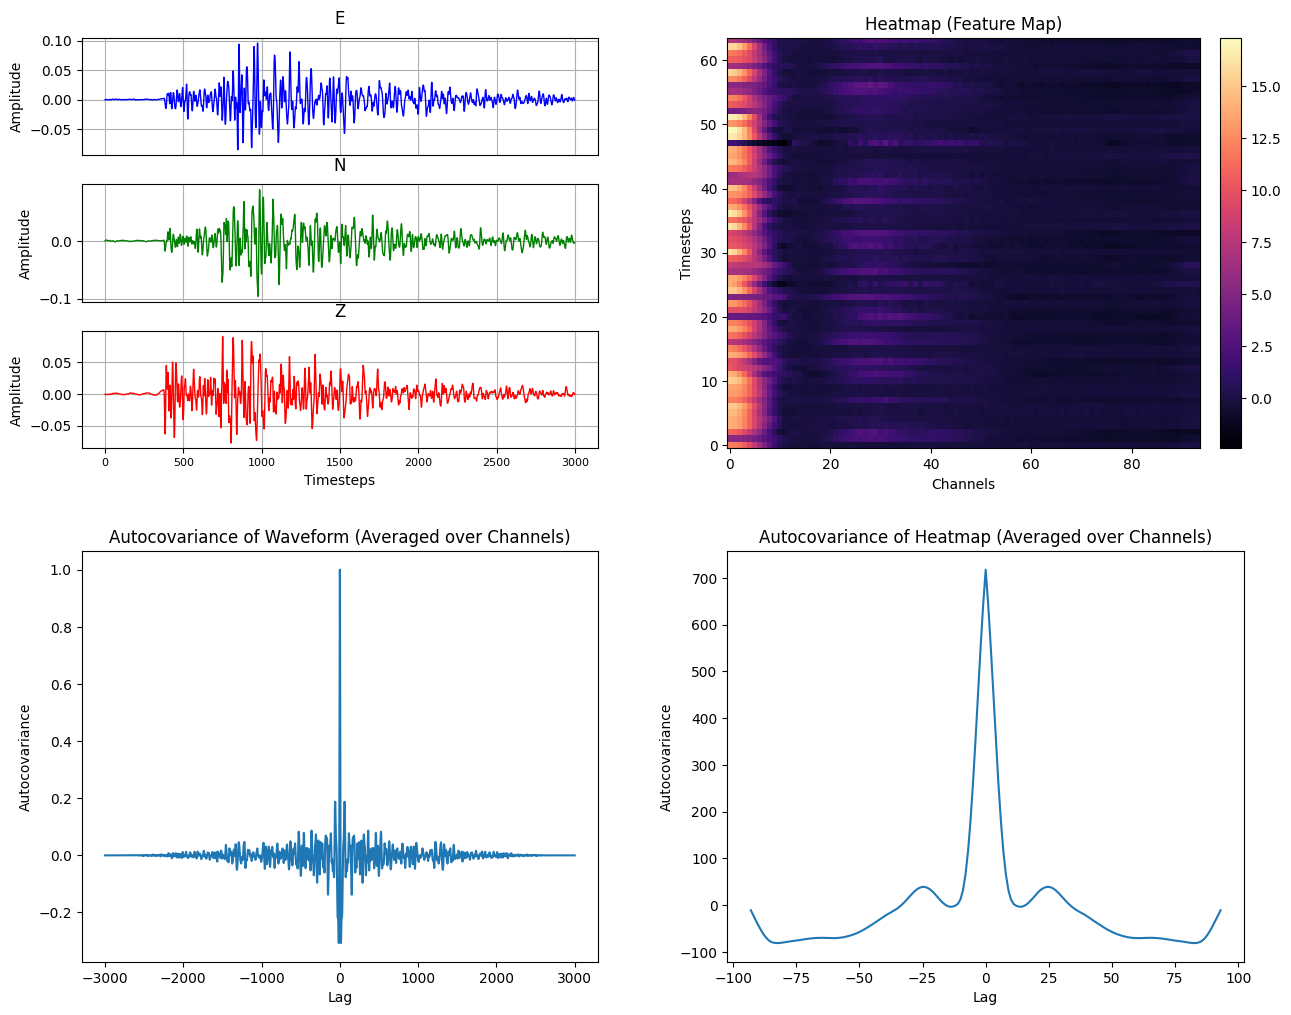

/tmp/ipykernel_542790/478625659.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


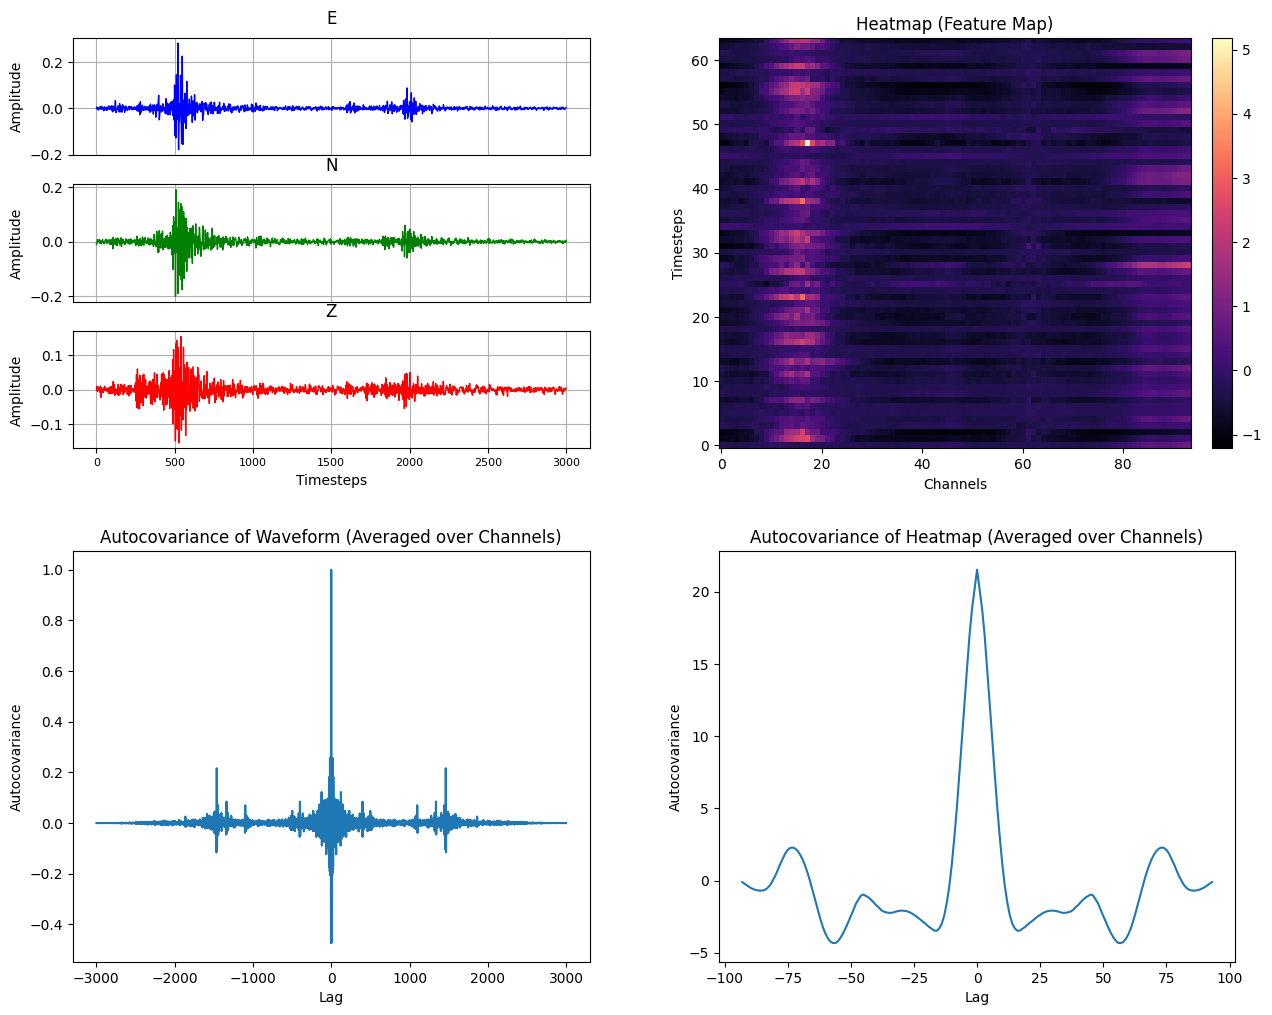

/tmp/ipykernel_542790/478625659.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


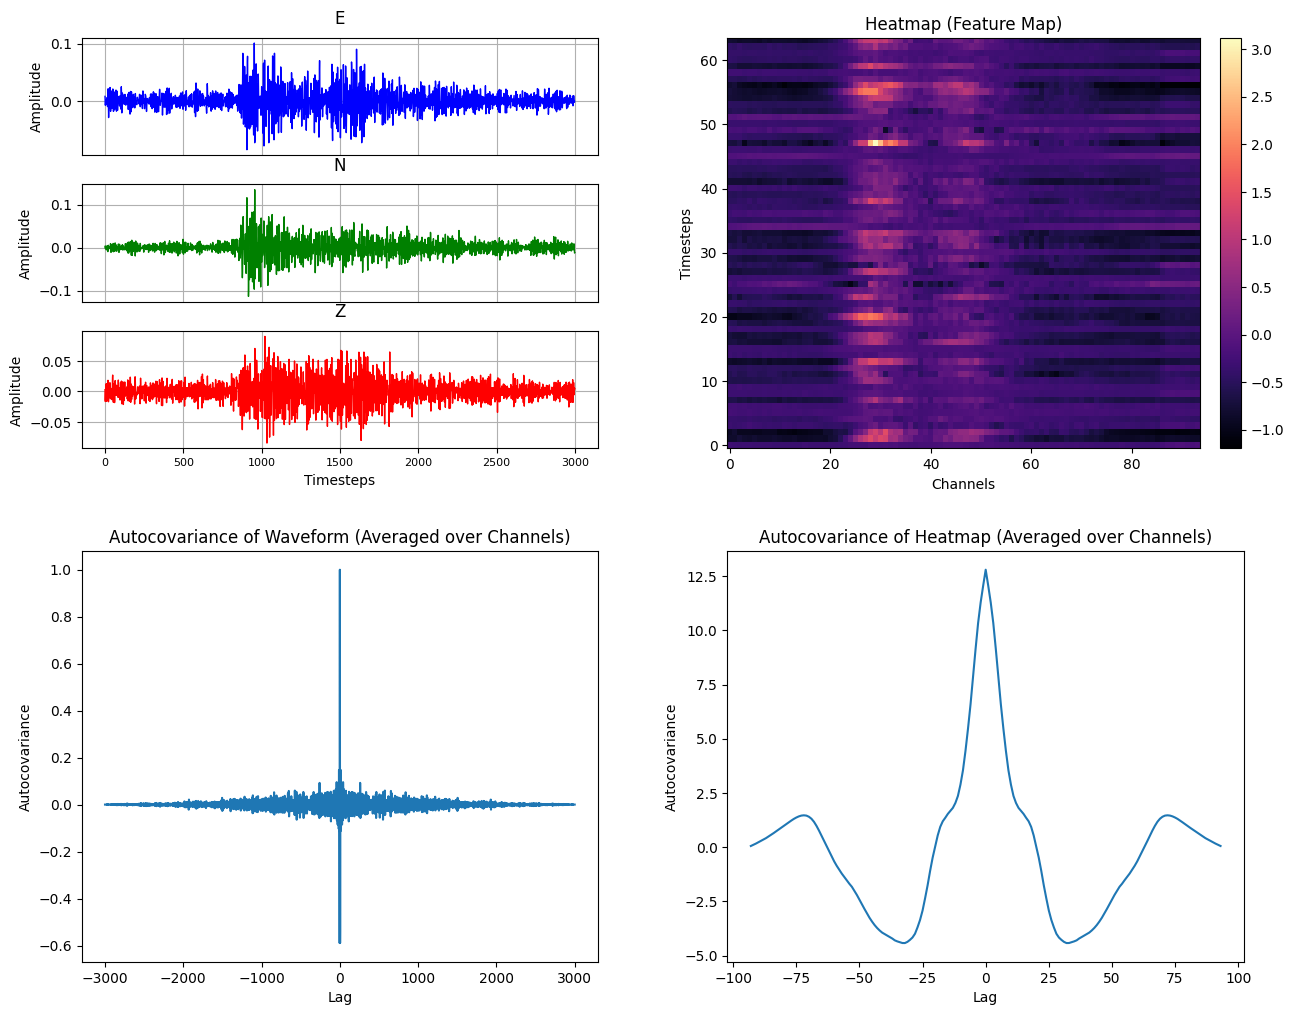

/tmp/ipykernel_542790/478625659.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


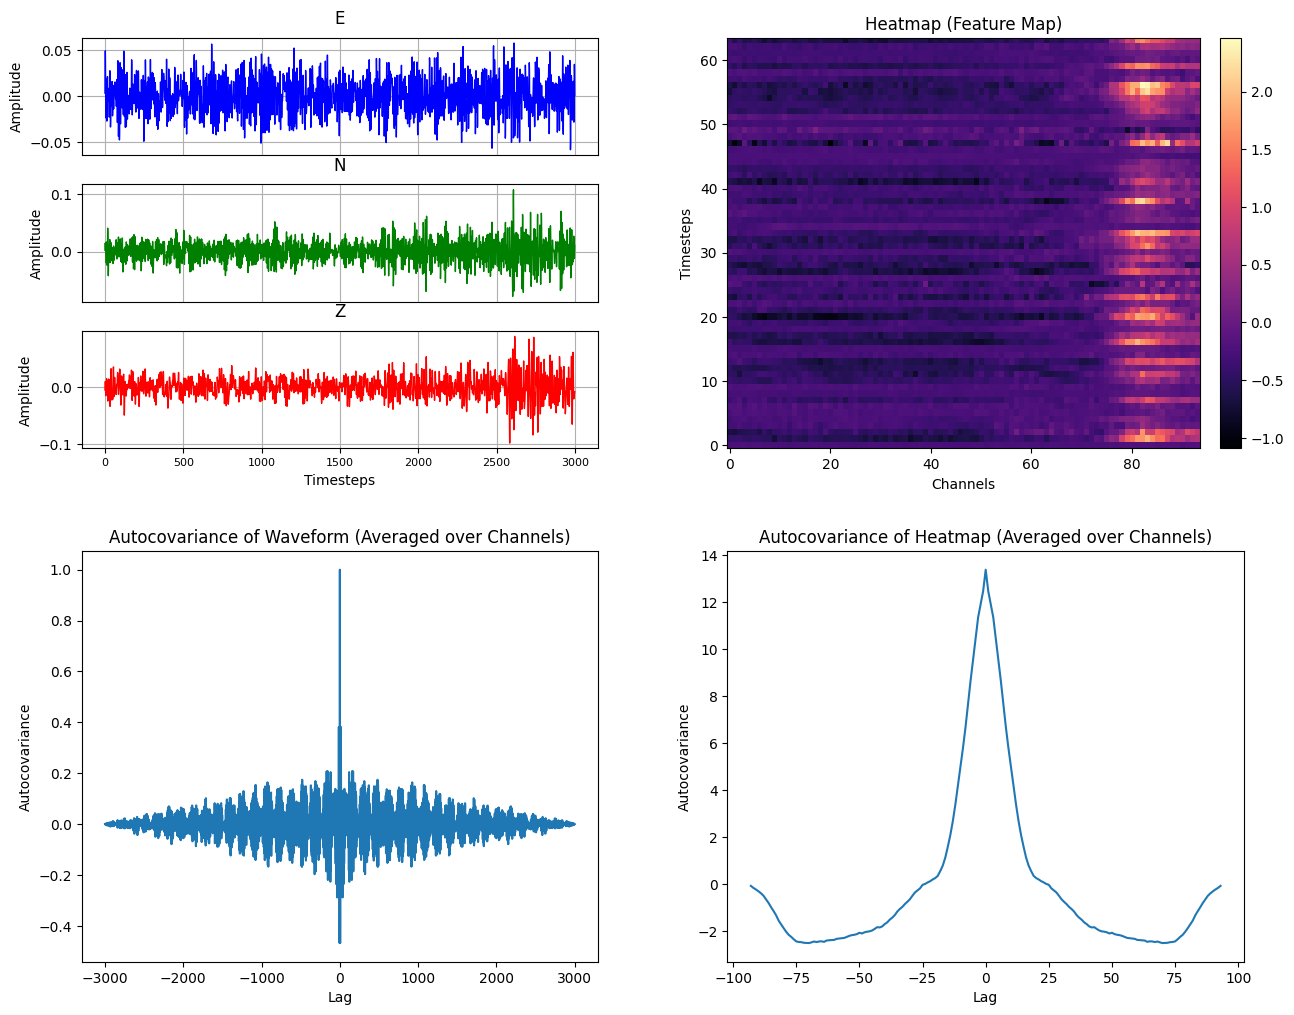

/tmp/ipykernel_542790/478625659.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


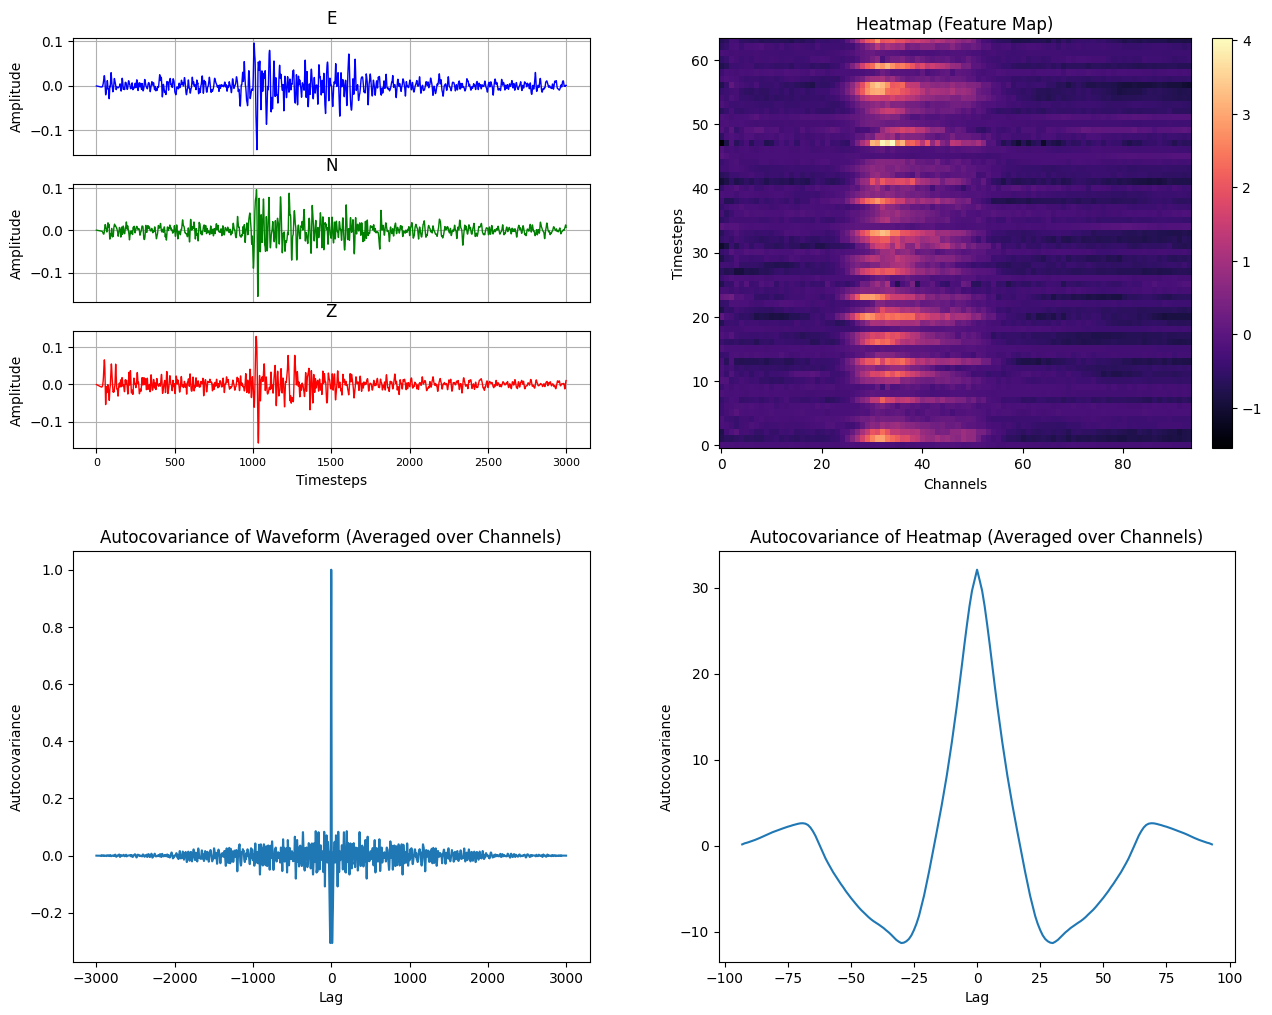

/tmp/ipykernel_542790/478625659.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


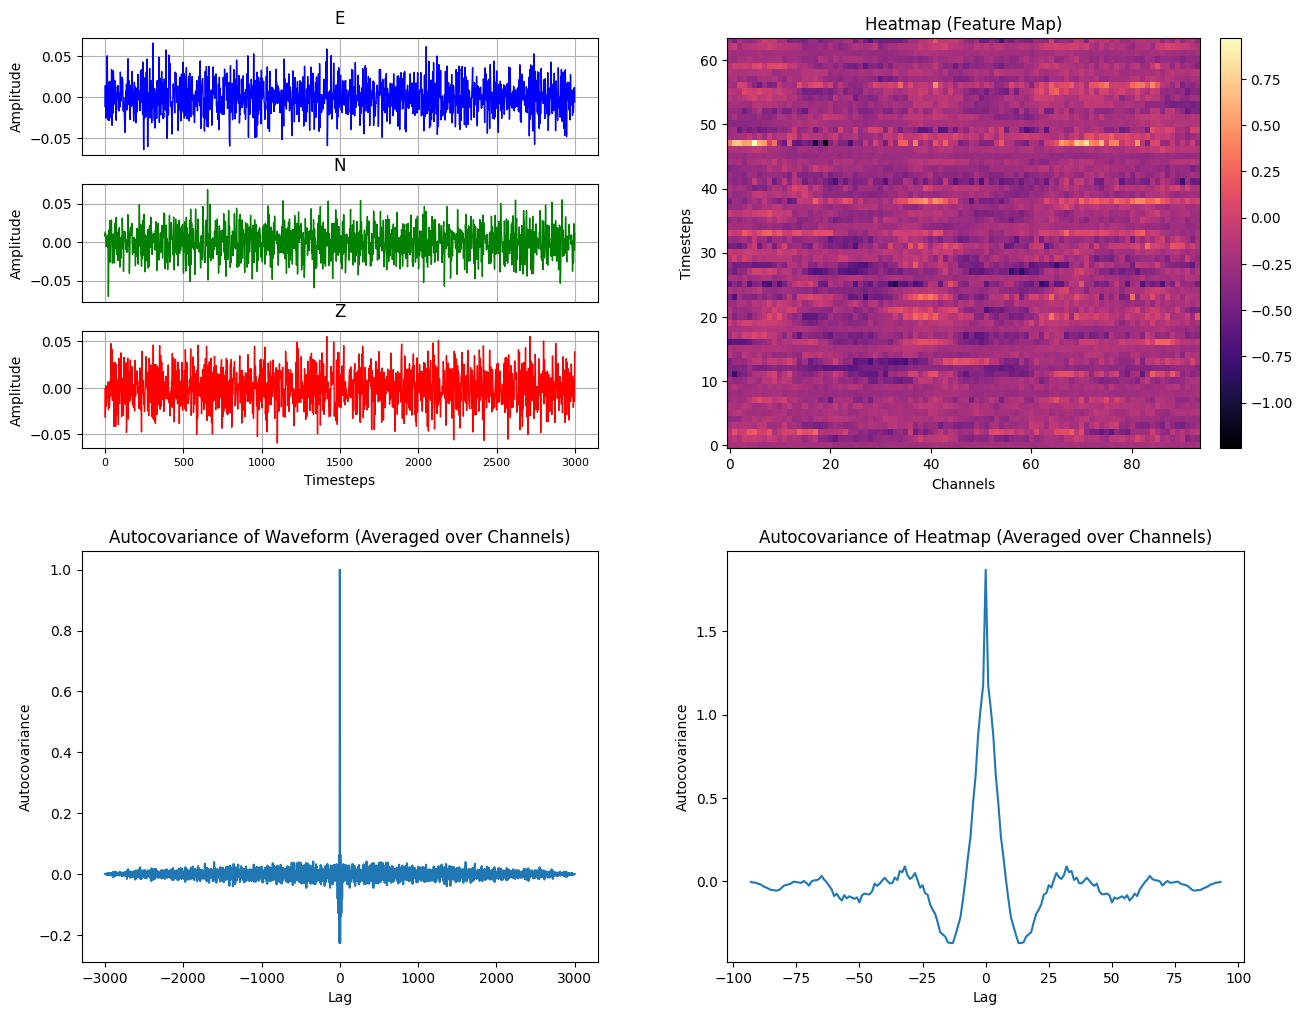

/tmp/ipykernel_542790/478625659.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


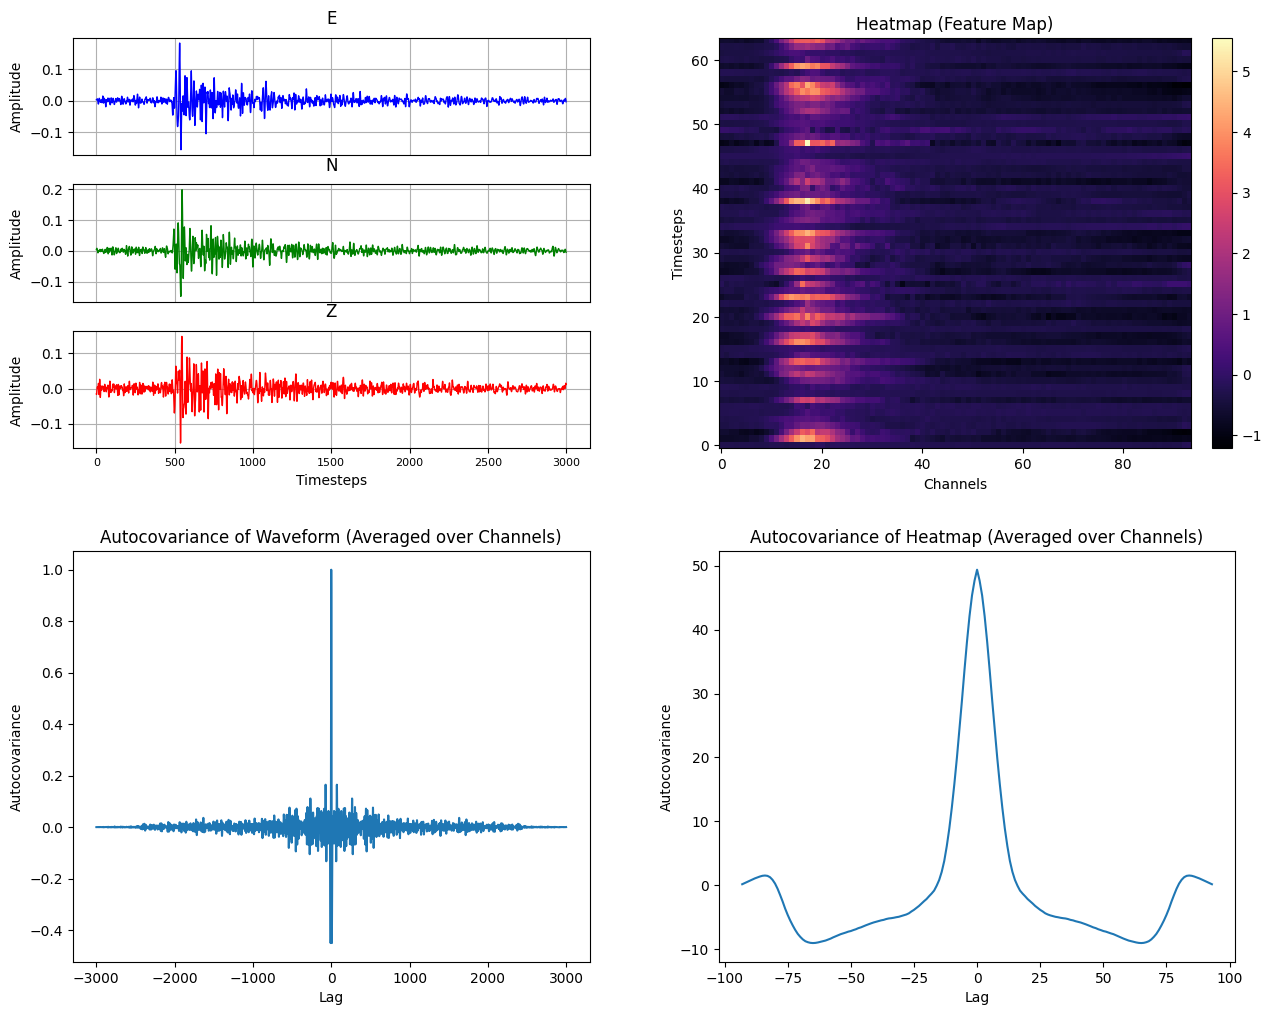

In [61]:
# Generate sample data
waveforms, labels, metadata = load_sample_data()
model = load_model()
feature_maps, __ = model(waveforms)

feature_maps = feature_maps.numpy()

for i in range(NUM_SAMPLES):
    waveform = waveforms[i]
    feature_map = feature_maps[i]
    
    # Compute autocovariance functions
    # For waveform
    lags_waveform, autocov_waveform = compute_autocovariance(waveform)

    # For heatmap
    lags_heatmap, autocov_heatmap = compute_autocovariance(feature_map)
    
    # Define colors for waveform channels
    waveform_colors = ['blue', 'green', 'red']
    
    # Create a figure with a 2x2 grid
    fig = plt.figure(figsize=(15, 12))  # Increased height for better spacing
    gs = GridSpec(2, 2, figure=fig, hspace=0.25, wspace=0.25)
    
    # Top-Left: Waveform Channels as Separate Subplots
    # Use subgridspec to create a nested GridSpec within the top-left cell
    waveform_gs = gs[0, 0].subgridspec(3, 1, hspace=0.25)  # Increased hspace for clarity
    timesteps = np.arange(waveform.shape[0])
    
    for channel in range(waveform.shape[1]):
        ax = fig.add_subplot(waveform_gs[channel, 0])
        # Only show x-ticks for the bottom subplot
        show_xticks = (channel == waveform.shape[1] - 1)
        plot_waveform_channel(ax, timesteps, waveform[:, channel], channel, color=waveform_colors[channel], show_xticks=show_xticks)
    
    # Top-Right: Heatmap
    ax_heatmap = fig.add_subplot(gs[0, 1])
    plot_heatmap(ax_heatmap, feature_map.T)
    
    # Bottom-Left: Autocovariance of Waveform (Averaged over Channels)
    ax_autocov_waveform = fig.add_subplot(gs[1, 0])
    plot_autocovariance(ax_autocov_waveform, lags_waveform, autocov_waveform, 
                        'Autocovariance of Waveform (Averaged over Channels)')
    
    # Bottom-Right: Autocovariance of Heatmap (Averaged over Channels)
    ax_autocov_heatmap = fig.add_subplot(gs[1, 1])
    plot_autocovariance(ax_autocov_heatmap, lags_heatmap, autocov_heatmap, 
                        'Autocovariance of Heatmap (Averaged over Channels)')
    
    # Adjust overall layout
    plt.tight_layout()
    plt.savefig(f"{i}.png")